##Data Prep

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
data ='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

!wget $data -O 'dataset-hw-6.csv'

--2023-10-22 15:18:13--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘dataset-hw-6.csv’

dataset-hw-6.csv    100%[===================>]   1.36M  --.-KB/s    in 0.01s   

2023-10-22 15:18:13 (104 MB/s) - ‘dataset-hw-6.csv’ saved [1423529/1423529]



In [32]:
df = pd.read_csv('dataset-hw-6.csv' )

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [33]:
df.ocean_proximity= df.ocean_proximity.str.lower().str.replace(' ','_')

In [34]:
df= df.loc[(df.ocean_proximity=='<1h_ocean') |  (df.ocean_proximity=='inland')]

In [35]:
df.ocean_proximity.value_counts()

<1h_ocean    9136
inland       6551
Name: ocean_proximity, dtype: int64

In [36]:
df= df.fillna(0)

In [37]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [38]:
df.median_house_value= np.log1p(df.median_house_value)

In [39]:
from sklearn.model_selection import train_test_split

df_full_train,df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train,df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [40]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test= df_val.reset_index(drop=True)

In [41]:
y_train =df_train['median_house_value'].values
y_val =df_val['median_house_value'].values
y_test =df_test['median_house_value'].values

In [42]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

##Q1

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer

In [43]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

In [46]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform (train_dicts)
X_val = dv.transform(val_dicts)

In [47]:
dt_reg = DecisionTreeRegressor(max_depth =1)

In [48]:
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [49]:
from sklearn.tree import export_text

In [51]:
print(export_text(dt_reg, feature_names=list(dv.get_feature_names_out())))


|--- ocean_proximity=<1h_ocean <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1h_ocean >  0.50
|   |--- value: [12.30]



##Q.2

In [54]:
from sklearn.ensemble import RandomForestRegressor


In [55]:
rf_reg = RandomForestRegressor(n_estimators=10,
                               random_state=1,
                               n_jobs=-1,
                               )

In [69]:
def rmse(y, y_pred):
  error = y-y_pred
  squared_error = error**2
  mean_squared_error =squared_error.mean()
  root_mean_squared_error=np.sqrt(mean_squared_error)
  return root_mean_squared_error

In [59]:
model= rf_reg.fit(X_train,y_train)
y_pred = model.predict(X_val)

In [61]:
print(rmse(y_val,y_pred).round(3))

0.245


##Q.3

In [62]:
n_estimators = np.arange(10,201,10)
n_estimators

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [64]:
for n in n_estimators:
  rf_reg = RandomForestRegressor(n_estimators=n,
                               random_state=1,
                               n_jobs=-1,
                               )
  rf_reg.fit(X_train,y_train)
  y_pred = rf_reg.predict(X_val)
  print('%d estimators %.3f rmse' %(n, rmse(y_val,y_pred).round(3)))


10 estimators 0.245 rmse
20 estimators 0.238 rmse
30 estimators 0.236 rmse
40 estimators 0.235 rmse
50 estimators 0.234 rmse
60 estimators 0.234 rmse
70 estimators 0.234 rmse
80 estimators 0.234 rmse
90 estimators 0.234 rmse
100 estimators 0.234 rmse
110 estimators 0.234 rmse
120 estimators 0.234 rmse
130 estimators 0.234 rmse
140 estimators 0.234 rmse
150 estimators 0.233 rmse
160 estimators 0.233 rmse
170 estimators 0.233 rmse
180 estimators 0.234 rmse
190 estimators 0.234 rmse
200 estimators 0.234 rmse


##Q.4

In [65]:
max_depth = [10, 15, 20, 25]

In [75]:
for m in max_depth:
  rmse_vals = []
  for n in n_estimators:
    rf_reg = RandomForestRegressor(n_estimators=n,
                                   max_depth =m,
                                random_state=1,
                                n_jobs=-1,
                                )
    rf_reg.fit(X_train,y_train)
    y_pred = rf_reg.predict(X_val)
    rmse_vals.append(rmse(y_val,y_pred))
  print('%d  max_depth %f mean rmse' %(m, np.mean(rmse_vals)))


10  max_depth 0.245462 mean rmse
15  max_depth 0.235763 mean rmse
20  max_depth 0.235005 mean rmse
25  max_depth 0.234691 mean rmse


##Q.5

In [76]:
rf_reg = RandomForestRegressor(n_estimators=10,
                                max_depth =20,
                            random_state=1,
                            n_jobs=-1,
                            )
rf_reg.fit(X_train,y_train)
y_pred = rf_reg.predict(X_val)
rmse_val=rmse(y_val,y_pred)

In [77]:
feature_names = dv.get_feature_names_out()
feature_imp = rf_reg.feature_importances_


In [81]:
len(feature_names)

10

In [80]:
  len(feature_imp)

10

In [83]:

for name, importance in zip (feature_names,feature_imp):
  print('%s importance %.5f'%(name,importance ))

households importance 0.01446
housing_median_age importance 0.03002
latitude importance 0.10249
longitude importance 0.08604
median_income importance 0.33554
ocean_proximity=<1h_ocean importance 0.21882
ocean_proximity=inland importance 0.14746
population importance 0.02827
total_bedrooms importance 0.01574
total_rooms importance 0.02116


##Q.6

In [84]:
!pip install xgboost

In [85]:
import xgboost as xgb

In [105]:
from xgboost import XGBRegressor


In [90]:
list(feature_names)

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1h_ocean',
 'ocean_proximity=inland',
 'population',
 'total_bedrooms',
 'total_rooms']

In [94]:
features = [s.replace('<','') for s in list(feature_names)]

In [96]:
dtrain =xgb.DMatrix(data=X_train, label=y_train, feature_names=features)
dval =xgb.DMatrix(data=X_val, label=y_val, feature_names=features)

In [129]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric':'rmse',

    'seed': 1,
    'verbosity': 1,
}

In [130]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [131]:
%%capture output
model = xgb.train(xgb_params, dtrain, num_boost_round=100 ,verbose_eval=5, evals=watchlist)


In [132]:
preds= model.predict(dval)

In [133]:
print(rmse(y_val,preds))

0.228623199980106


In [119]:
def parse_xgb_output(output):
  results=[]
  for line in output.stdout.strip().split('\n'):
    it_line, train_line, val_line = line.split('\t')
    it = int(it_line.strip('[]'))
    train = float(train_line.split(':')[1])
    val = float(val_line.split(':')[1])
    results.append((it,train,val))
  columns=['num_iter','train_rmse','val_rmse']
  df_results=pd.DataFrame(results, columns=columns)
  return df_results

In [120]:
df_score= parse_xgb_output(output)

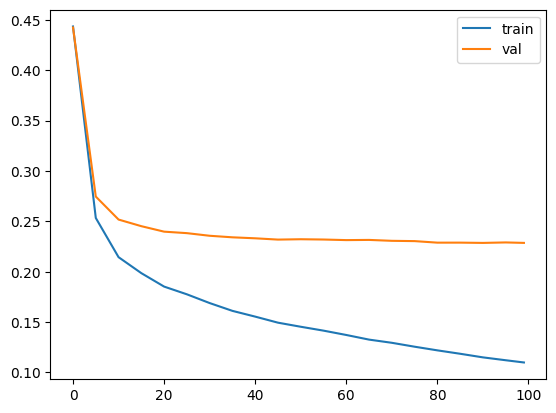

In [122]:
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.legend()

In [134]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric':'rmse',

    'seed': 1,
    'verbosity': 1,
}

In [135]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [136]:
%%capture output
model = xgb.train(xgb_params, dtrain, num_boost_round=100 ,verbose_eval=5, evals=watchlist)


In [137]:
preds= model.predict(dval)

In [138]:
print(rmse(y_val,preds))

0.23208927121609343


In [126]:
def parse_xgb_output(output):
  results=[]
  for line in output.stdout.strip().split('\n'):
    it_line, train_line, val_line = line.split('\t')
    it = int(it_line.strip('[]'))
    train = float(train_line.split(':')[1])
    val = float(val_line.split(':')[1])
    results.append((it,train,val))
  columns=['num_iter','train_rmse','val_rmse']
  df_results=pd.DataFrame(results, columns=columns)
  return df_results

In [127]:
df_score= parse_xgb_output(output)

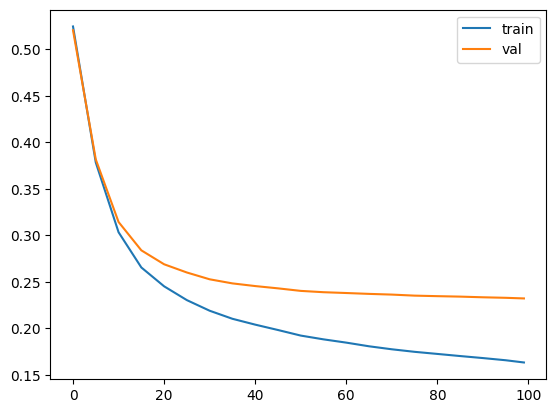

In [128]:
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.legend()